<center>
    <img src="https://internship.thesparksfoundation.info/assests/img/logo.png" width="300" alt="thesparksfoundation logo"  />
</center>

# GRIP - THE SPARK FOUNDATION
## DATA SCIENCE AND BUISNESS ANALYTICS INTERNSHIP

## Prediction using Supervised ML

## Author : Ashwin Chaudhari


# Task-1: Predict the percentage of an student based on the no. of study hours

### In this regression task we will predict the percentage of marks that a student is expected to score based on the number of hours the studied. this is a simple linear regression task as it involves just two variables. 

# 1. Import the required Libraries



In [1]:
# warnings 
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

%matplotlib inline

## 2.  Reading The Data from data source



In [2]:
student = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("data Imported sucessfully")

data Imported sucessfully


## 3. Understanding the DataSet

In [3]:
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
student.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
student.shape

(25, 2)

In [7]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# 4. checking the missing values

In [8]:
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

# 5. Data Visualization

## 5.1 Visualization with line plot

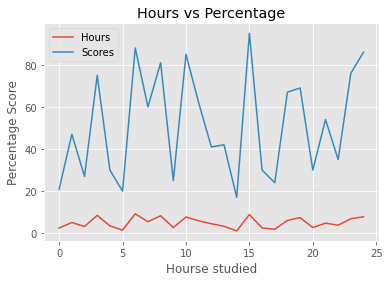

In [9]:
plt.style.use('ggplot')
student.plot(kind='line')
plt.title('Hours vs Percentage')
plt.xlabel('Hourse studied')
plt.ylabel('Percentage Score')
plt.show()

## 5.2  Data Visualisation with area plot

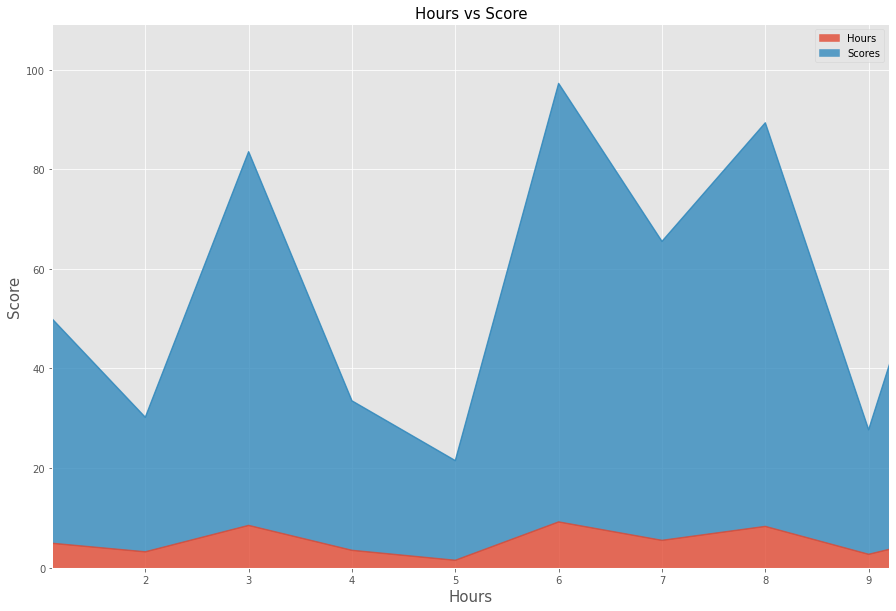

In [10]:
xmin = min(student.Hours)
xmax = max(student.Hours)
student.plot(kind='area',alpha=0.8,stacked=True,figsize=(15,10),xlim=(xmin,xmax))
plt.title('Hours vs Score',size=15)
plt.xlabel('Hours',size=15)
plt.ylabel('Score',size=15)
plt.show()

## 5.3 Data visualizing with scatter plot

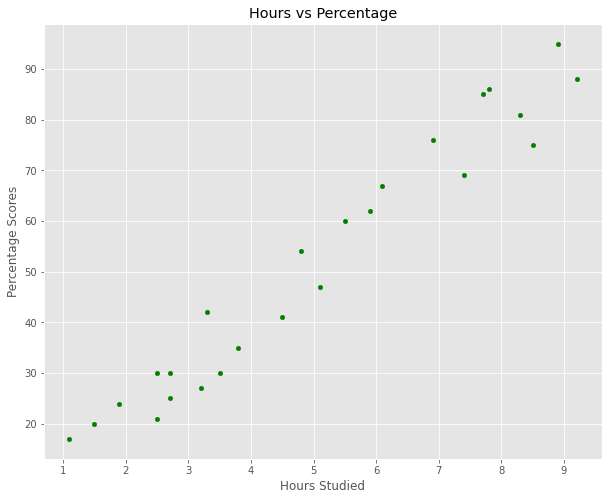

In [11]:
# Plotting the distribution of scores to unserstand the relation between the data.
student.plot(kind='scatter',x='Hours',y='Scores',color='g',figsize=(10,8))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

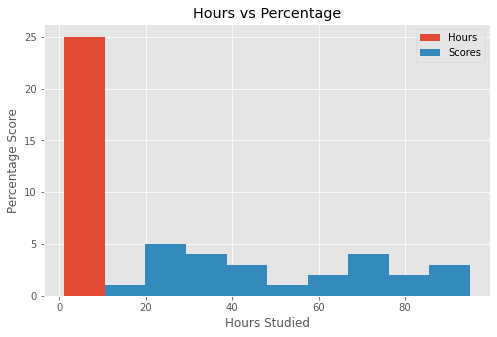

In [12]:
student.plot(kind='hist', figsize=(8, 5))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

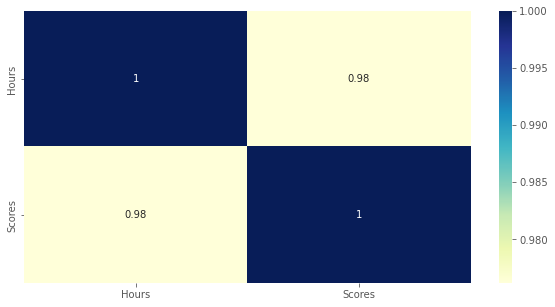

In [13]:
# Checking the correlations
plt.figure(figsize=(10,5))
sns.heatmap(student.corr(),annot=True,cmap="YlGnBu",annot_kws={'fontsize':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


### By Visulization we come to know that this problem can be easily solved by linear regression

# 6. Modeling the data

In [14]:
x = np.asanyarray(student[['Hours']])
y = np.asanyarray(student[['Scores']])

# Using train test split to split the data in train and test Data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)
regressor = LinearRegression()
regressor.fit(train_x,train_y)

print("Training Complete\n")
print('coehhicient: ', regressor.coef_)
print('Intercept: ',regressor.intercept_)

Training Complete

coehhicient:  [[9.94061514]]
Intercept:  [1.50791048]


## 6.1 we can also plot the fit line over the data in single   linear regression 

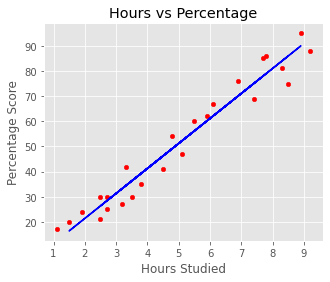

In [15]:
# Plotting the best fitted line on the graph 
student.plot(kind='scatter',x='Hours',y='Scores',figsize=(5,4),color='r')
plt.plot(train_x, regressor.coef_[0]*train_x + regressor.intercept_,color='b')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()



### The blue line is the best fit line for this data

## 6.2 Making Prediction

In [16]:
print(test_x) # Testing data - In Hours
y_pred = regressor.predict(test_x) # Predicting the scores

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [17]:
prediction = pd.DataFrame({'Hours': [i[0] for i in test_x], 'Predicted Marks': [k for k in y_pred]})
prediction

,Hours,Predicted Marks
0,1.1,[12.442587140279223]
1,2.5,[26.359448340673122]
2,1.9,[20.39507925479002]
3,9.2,[92.96156979970107]
4,6.9,[70.09815497048253]


## 6.3 Comparing the Predicted Marks with the Actual Marks

In [18]:
compare_scores = pd.DataFrame({'Actual Marks': [i[0] for i in test_y], 'Predicted Marks': [k for k in y_pred]})
compare_scores

,Actual Marks,Predicted Marks
0,17,[12.442587140279223]
1,21,[26.359448340673122]
2,24,[20.39507925479002]
3,88,[92.96156979970107]
4,76,[70.09815497048253]


## 6.4 Visually Comparing the Predicted Marks with the Actual Marks

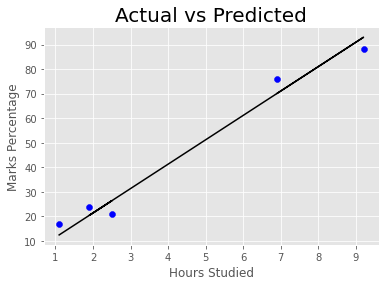

In [19]:
plt.scatter(x=test_x, y=test_y, color='blue')
plt.plot(test_x, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


# 7. Evaluation of model

In [20]:
# Using metrics to find mean obsolute error and r2 to see the accuracy

from sklearn import metrics
from sklearn.metrics import r2_score

y_pred=regressor.predict(test_x)
print('Mean Absolute Error : {}'.format(metrics.mean_absolute_error(y_pred,test_y)))
print("R2-score: %.2f" % r2_score(y_pred, test_y))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error : 4.877039354964484
R2-score: 0.98
Root Mean Squared Error: 4.938382360637607


## 7.1 Predicting the score with the single input value

In [21]:
hours = 9.25
predicted_score = regressor.predict([[hours]])
print(f'No. of hours = {hours}')
print(f'predicted Score  = {predicted_score[0]}')


No. of hours = 9.25
predicted Score  = [93.45860056]


#  Conclusion: 

### We can see the value of the root mean squared error is 4.938 and. Mean absolute Error: it is mean of absolute value of error r2-score: it is not the error but its the metric for accuracy for the model. Higher the r2 value higher is the accuracy of model. Best score is 1¶ Hence, it is safe to conclue the model did a decent job to predict the the student score as 93.45 % when student studies for 9.25 hours.